In [105]:
# importting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [119]:
df = pd.read_csv("winequality-red.csv", na_values='Null')
print(df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4               NaN         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            NaN               NaN         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9        NaN   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                    34   0.9978  3.51       0.56   
1                 25.0                    67      NaN  3.20       0.68   
2                 15.0                    54   0.9970  3.26       0.65   
3                 17.0                    60   0.9980  3.16       0.58   
4                 11.0                    34   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      4.7  
1      9.8      5.0  
2      9.8      4.5 

In [107]:
feature_with_na = [features for features in df.columns if df[features].isnull().sum()>1];

print(feature_with_na)

for feature in feature_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

['fixed_acidity', 'volatile_acidity']
fixed_acidity 0.3  % missing values
volatile_acidity 0.2  % missing values


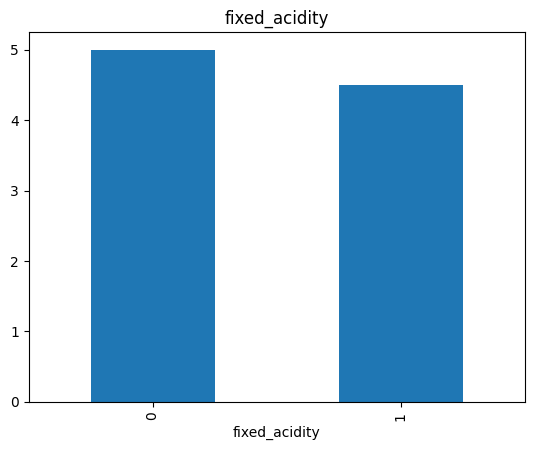

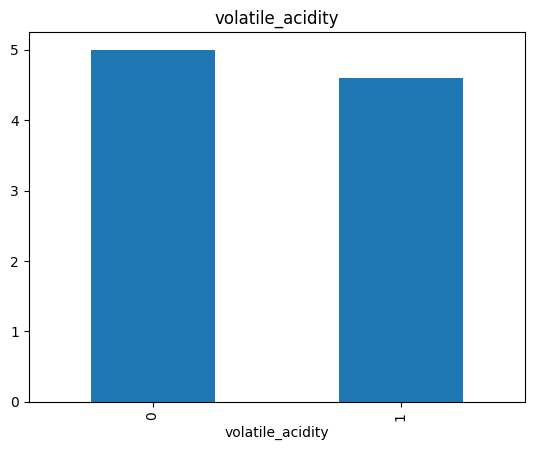

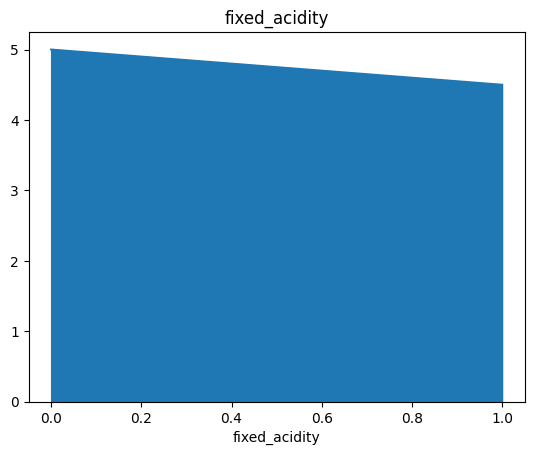

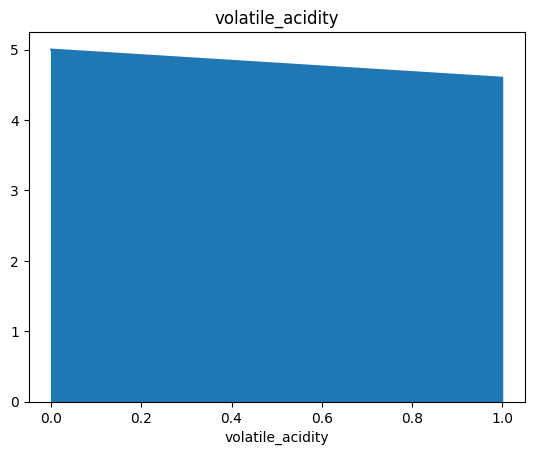

In [108]:
for feature in feature_with_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['quality'].median().plot.bar()
    plt.title(feature)
    plt.show()


for feature in feature_with_na:
    data_area = df.copy()
    data_area[feature] = np.where(data_area[feature].isnull(), 1, 0)
    data_area.groupby(feature)['quality'].median().plot.area()
    plt.title(feature)
    plt.show()

In [132]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("numerical feature", numerical_features)

discrete_feature = [feature for feature in numerical_features if len(df[feature].unique()) <= 6]
print("discreate feature", discrete_feature)

numerical feature ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
discreate feature ['fixed_acidity', 'free_sulfur_dioxide', 'alcohol', 'quality']


In [110]:
quality_values = df['quality'].tolist()
print(quality_values)

quality_mean = np.mean(quality_values)
print("Mean of quality values: ", quality_mean)

quality_median = np.median(quality_values)
print("Median of quality values: ", quality_median)

quality_std = np.std(quality_values)
print("Standard deviation of quality values: ", quality_std)

[4.7, 5.0, 4.5, 6.0, 5.0, 5.0, 6.8, 5.0, 5.0, 4.5]
Mean of quality values:  5.15
Median of quality values:  5.0
Standard deviation of quality values:  0.6786015030929418


In [111]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,7.000000,8.000000,10.000000,10.000000,9.000000,9.000000,10.000000,9.000000,10.000000,10.000000,10.00000,10.000000
mean,8.142857,0.596250,0.112000,2.330000,0.079667,15.000000,51.400000,0.996900,3.332000,0.587000,9.68000,5.150000
std,1.363644,0.170708,0.191416,1.376025,0.012570,4.690416,25.325437,0.001129,0.117265,0.101001,0.38239,0.715309
min,7.400000,0.280000,0.000000,1.200000,0.065000,9.000000,18.000000,0.994600,3.160000,0.460000,9.20000,4.500000
25%,7.450000,0.560000,0.000000,1.825000,0.071000,11.000000,34.000000,0.996400,3.265000,0.545000,9.40000,4.775000
50%,7.800000,0.590000,0.030000,1.900000,0.076000,15.000000,56.500000,0.997000,3.325000,0.565000,9.65000,5.000000
75%,7.850000,0.662500,0.075000,2.225000,0.092000,17.000000,63.750000,0.997800,3.382500,0.632500,9.80000,5.000000
max,11.200000,0.880000,0.560000,6.100000,0.098000,25.000000,102.000000,0.998000,3.510000,0.800000,10.50000,6.800000


In [112]:
df.columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [113]:
df.isnull().sum()

fixed_acidity           3
volatile_acidity        2
citric_acid             0
residual_sugar          0
chlorides               1
free_sulfur_dioxide     1
total_sulfur_dioxide    0
density                 1
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [114]:
df.nunique()

fixed_acidity           5
volatile_acidity        7
citric_acid             7
residual_sugar          8
chlorides               8
free_sulfur_dioxide     5
total_sulfur_dioxide    9
density                 7
pH                      9
sulphates               9
alcohol                 6
quality                 5
dtype: int64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         7 non-null      float64
 1   volatile_acidity      8 non-null      float64
 2   citric_acid           10 non-null     float64
 3   residual_sugar        10 non-null     float64
 4   chlorides             9 non-null      float64
 5   free_sulfur_dioxide   9 non-null      float64
 6   total_sulfur_dioxide  10 non-null     int64  
 7   density               9 non-null      float64
 8   pH                    10 non-null     float64
 9   sulphates             10 non-null     float64
 10  alcohol               10 non-null     float64
 11  quality               10 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 1.1 KB


quality
5.0    5
4.5    2
4.7    1
6.0    1
6.8    1
Name: count, dtype: int64


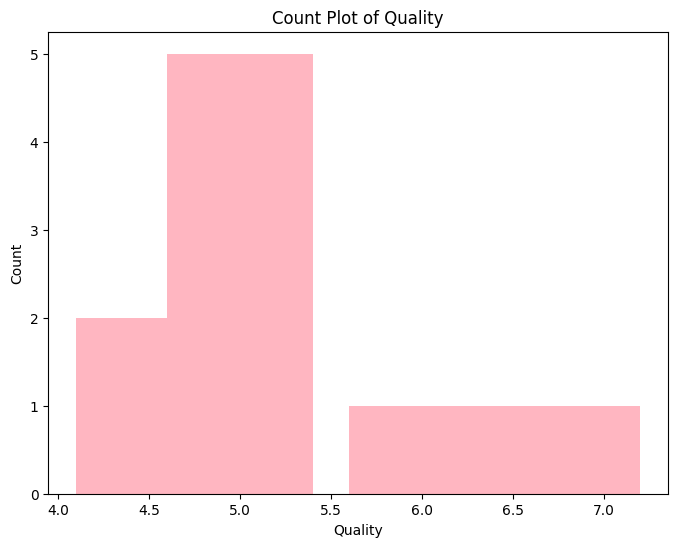

In [116]:
# Assuming 'df' is your DataFrame
quality_counts = df['quality'].value_counts()
print(quality_counts)

# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='lightpink')
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [117]:
df.dropna()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5.0
7,7.8,0.58,0.02,2.0,0.073,9.0,18,0.9968,3.36,0.57,9.5,5.0
8,7.5,0.50,0.36,6.1,0.071,17.0,102,0.9978,3.35,0.80,10.5,5.0


In [118]:
# shape of the data
df.shape


(10, 12)